In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from wordcloud import WordCloud
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

In [29]:
df = pd.read_csv('Cleaned_jobs.csv')
df= pd.DataFrame(df)
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,avg_salary($K),salary_category,Job_State,same_state,company_age,skills,work_experience,job_simp,seniority,No_of_Competitors
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,Nonprofit Organization,...,154.0,high,NY,1,31.0,"r, aws, azure, machine learning, statistics, d...",6,data scientist,senior,3
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,Public,...,154.0,high,VA,0,56.0,"r, sql, big data, hadoop, machine learning, st...",15,data scientist,na,1
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,Private Practice / Firm,...,154.0,high,MA,1,43.0,"python, r, c++, aws, excel, machine learning, ...",2,data scientist,na,1
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,Public,...,154.0,high,MA,0,24.0,"python, r, sql, aws, excel, machine learning, ...",2,data scientist,na,3
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,Private,...,154.0,high,NY,1,26.0,"python, r, sql, excel, machine learning, stati...",6,data scientist,na,3


In [30]:
df.describe()

,index,Rating,Revenue,min_salary($K),max_salary($K),avg_salary($K),same_state,company_age,work_experience,No_of_Competitors
count,644.000000,644.000000,6.440000e+02,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000
mean,329.984472,3.877174,2.290008e+09,98.791925,147.989130,123.390528,0.417702,37.813665,6.131988,1.465839
std,194.102816,0.598825,3.002152e+09,33.277852,48.317298,39.869500,0.493564,38.053937,10.837681,0.818002
min,0.000000,2.000000,1.000000e+06,31.000000,56.000000,43.500000,0.000000,5.000000,1.000000,1.000000
25%,162.750000,3.500000,7.500000e+07,79.000000,119.000000,103.000000,0.000000,15.000000,3.000000,1.000000
50%,324.500000,3.800000,1.180000e+09,91.000000,132.000000,114.000000,0.000000,25.000000,5.000000,1.000000
75%,501.250000,4.300000,3.500000e+09,122.000000,165.000000,136.500000,1.000000,42.000000,6.000000,2.000000
max,671.000000,5.000000,1.000000e+10,212.000000,331.000000,271.500000,1.000000,243.000000,160.000000,3.000000


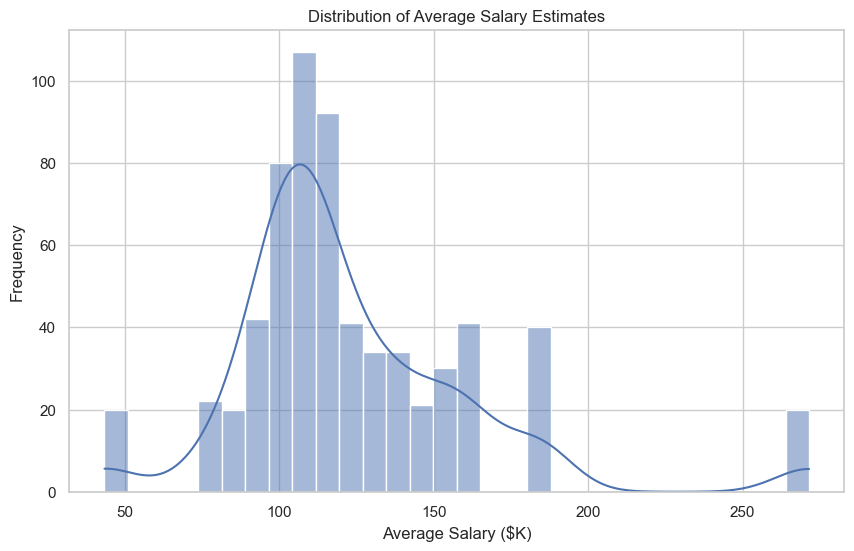

In [31]:
# Set the style for seaborn
sns.set_theme(style='whitegrid')

# Create a histogram for average salary
plt.figure(figsize=(10, 6))
sns.histplot(df['avg_salary($K)'], bins=30, kde=True)
plt.title('Distribution of Average Salary Estimates')
plt.xlabel('Average Salary ($K)')
plt.ylabel('Frequency')
plt.show()

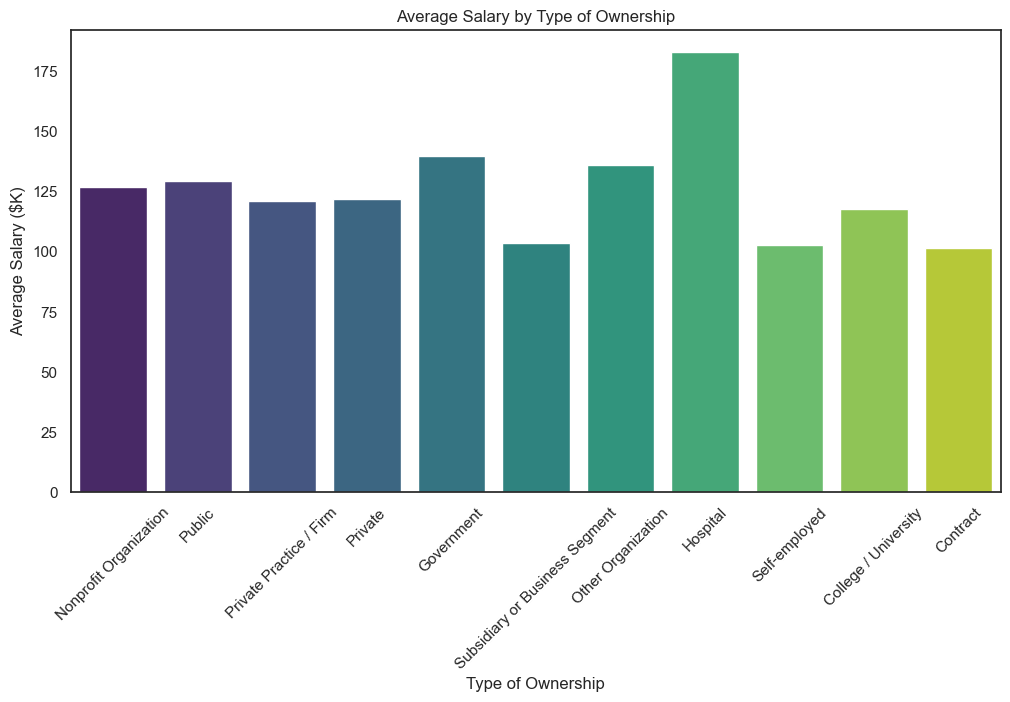

In [32]:
# Create a bar plot for average salary by job type
sns.set_theme(style="white") 
plt.figure(figsize=(12, 6))
sns.barplot(x='Type of ownership', y='avg_salary($K)', data=df, estimator='mean', errorbar=None, palette='viridis', hue='Type of ownership', legend=False)
plt.title('Average Salary by Type of Ownership')
plt.xlabel('Type of Ownership')
plt.ylabel('Average Salary ($K)')
plt.xticks(rotation=45)
plt.show()

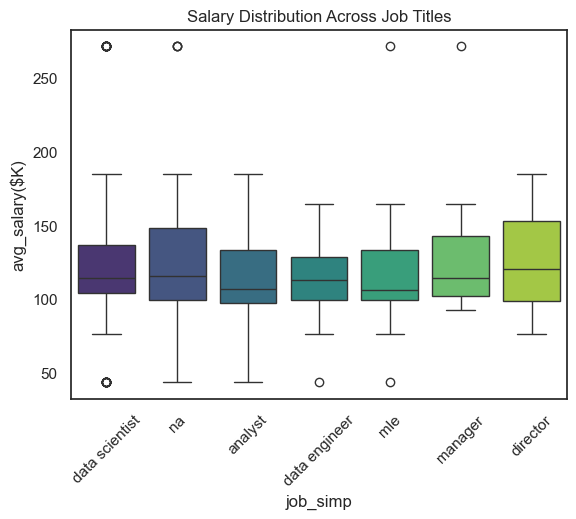

In [33]:
# Boxplot for salary distribution
sns.set_theme(style="white") 
sns.boxplot(x="job_simp", y="avg_salary($K)", data=df, palette='viridis', hue = "job_simp", legend=False)
plt.title("Salary Distribution Across Job Titles")
plt.xticks(rotation=45)
plt.show()


C:\Users\pavit\AppData\Local\Temp\ipykernel_24292\333687578.py:10: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



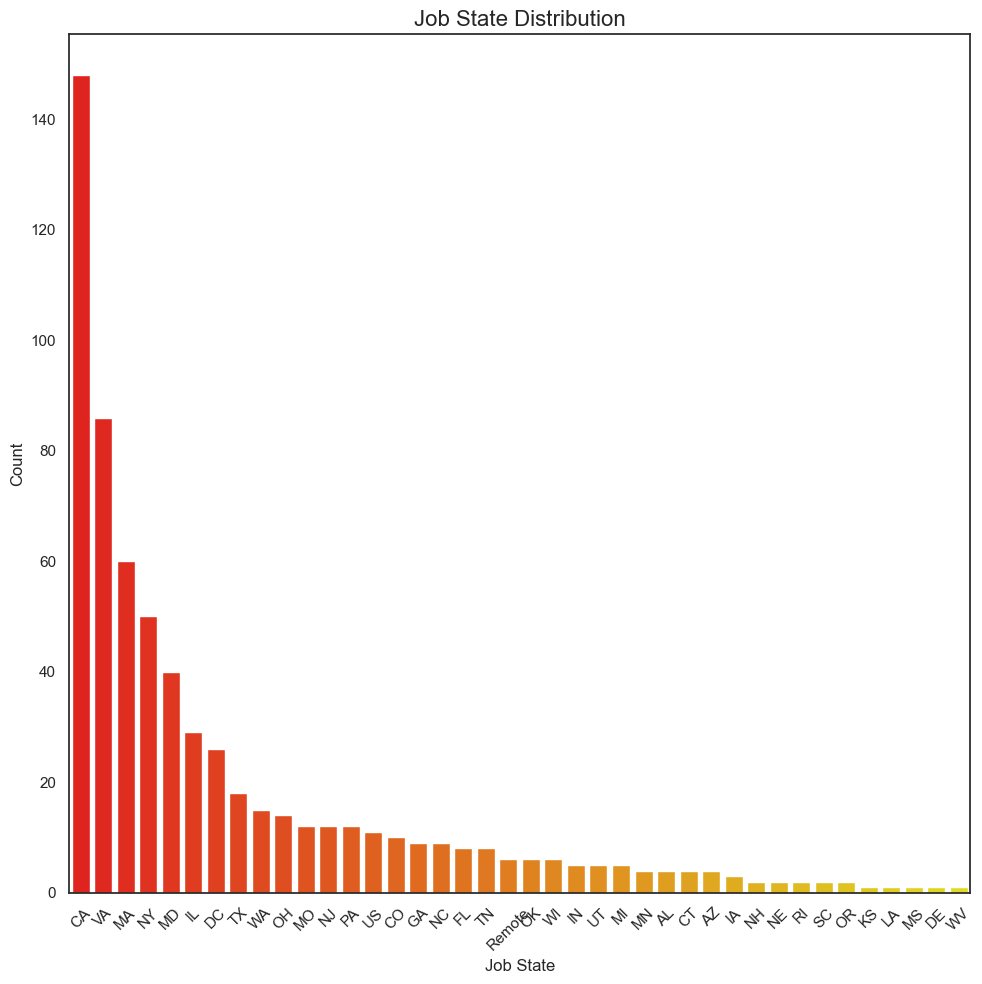

In [34]:
# Assuming 'df' is your DataFrame
sns.set_theme(style="white") 
fig, ax = plt.subplots(figsize=(10, 10))

# Create a bar plot with job state counts
chart = sns.barplot(x=df['Job_State'].value_counts().index, 
                    y=df['Job_State'].value_counts().values, ax=ax, palette='autumn', legend=False, hue = df['Job_State'].value_counts().index)

# Rotate x-axis labels for better readability
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

plt.title("Job State Distribution", fontsize=16)
plt.xlabel("Job State", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\pavit\AppData\Local\Temp\ipykernel_24292\323704710.py:4: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



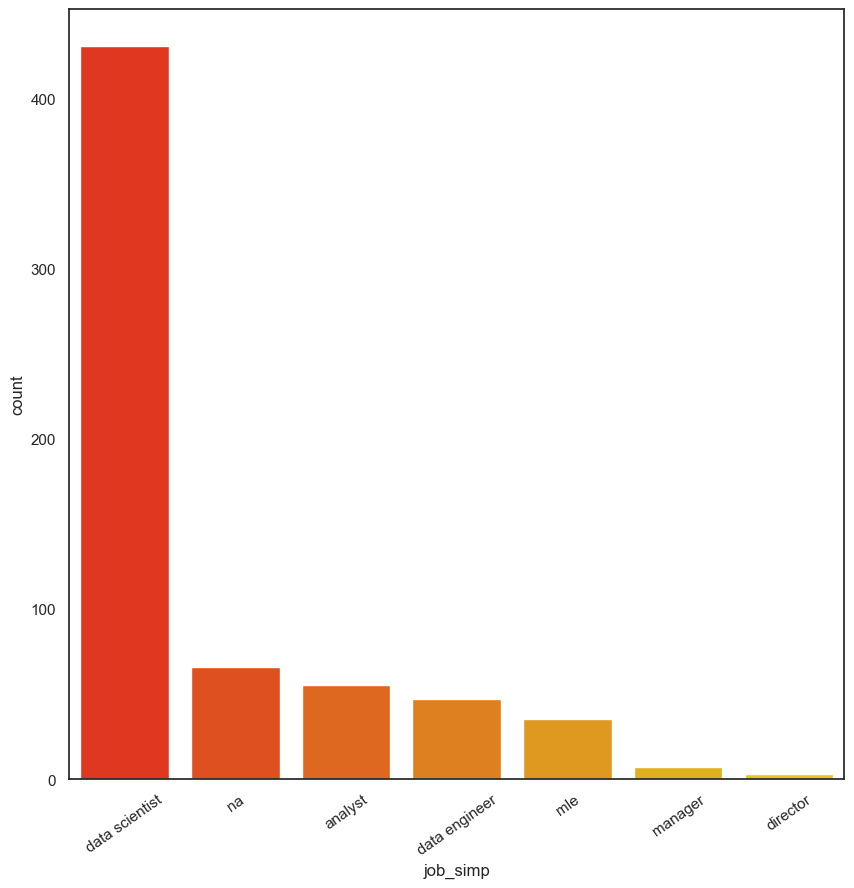

In [35]:
sns.set_theme(style="white") 
fig, ax = plt.subplots(figsize=(10,10)) 
chart = sns.barplot(x=df.job_simp.value_counts().index, y=df.job_simp.value_counts(), palette='autumn', legend=False, hue=df.job_simp.value_counts().index)
_=chart.set_xticklabels(chart.get_xticklabels(), rotation=35)

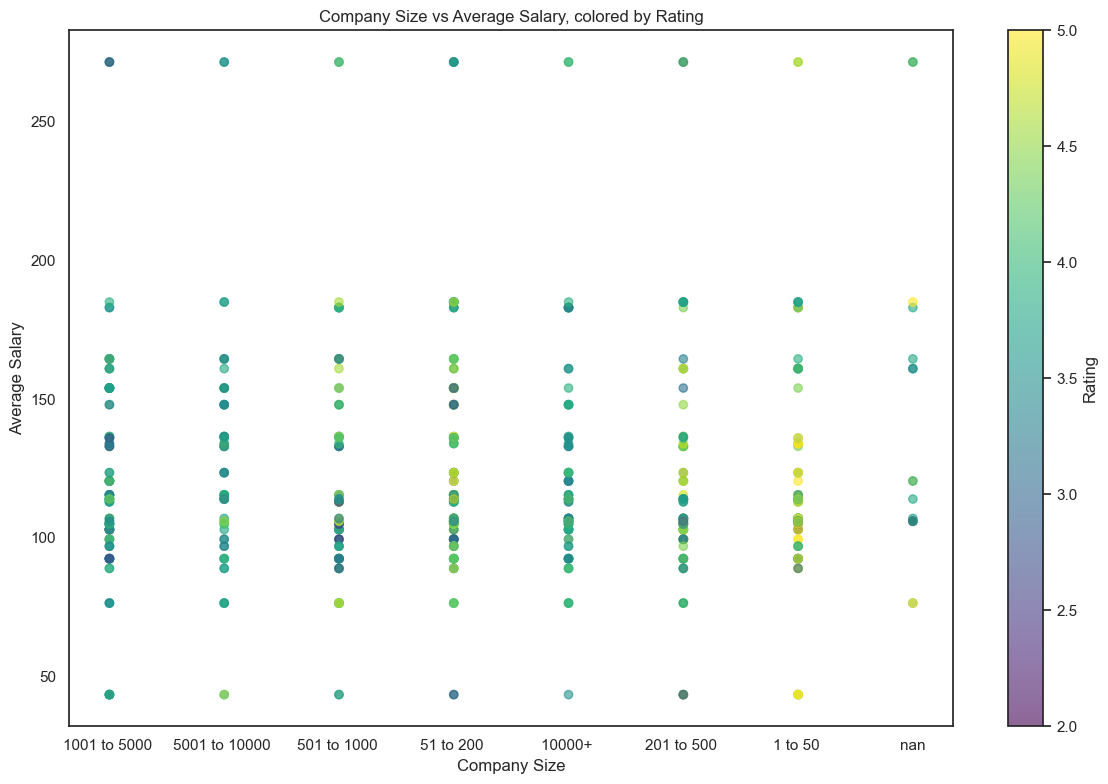

In [36]:
df['Size'] = df['Size'].astype('str')
df['avg_salary($K)'] = pd.to_numeric(df['avg_salary($K)'], errors='coerce') 

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    x=df['Size'], 
    y=df['avg_salary($K)'], 
    c=df['Rating'], 
    cmap='viridis',
    alpha=0.6
)

plt.colorbar(scatter, label='Rating')
plt.xlabel('Company Size')
plt.ylabel('Average Salary')
plt.title('Company Size vs Average Salary, colored by Rating')
plt.tight_layout()
plt.show()


In [37]:
corr_size_salary = df['Size'].astype('category').cat.codes.corr(df['avg_salary($K)'])
corr_size_rating = df['Size'].astype('category').cat.codes.corr(df['Rating'])
corr_salary_rating = df['avg_salary($K)'].corr(df['Rating'])

print("Correlation coefficients:")
print(f"Company Size vs Average Salary: {corr_size_salary:.2f}")
print(f"Company Size vs Rating: {corr_size_rating:.2f}")
print(f"Average Salary vs Rating: {corr_salary_rating:.2f}")

Correlation coefficients:
Company Size vs Average Salary: 0.07
Company Size vs Rating: -0.04
Average Salary vs Rating: 0.00


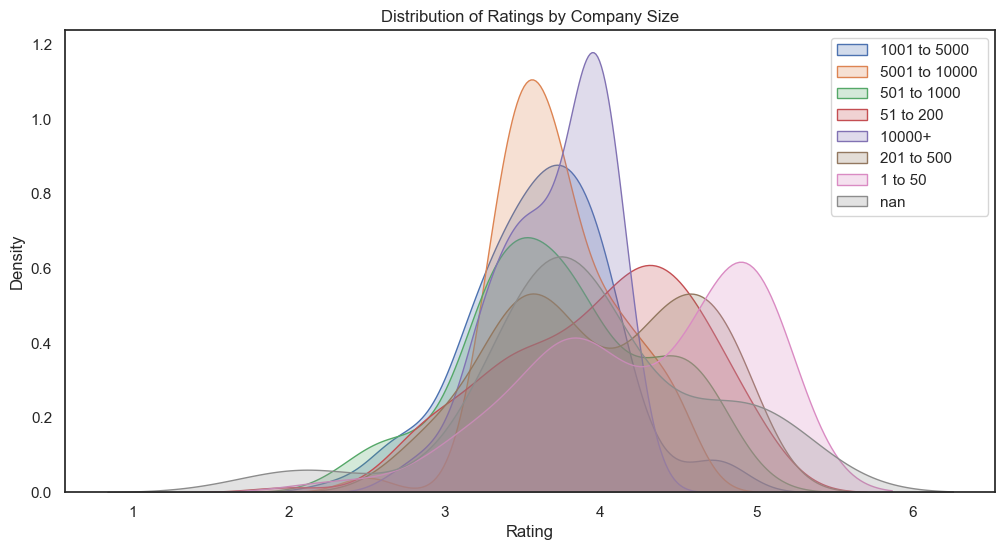

In [38]:
plt.figure(figsize=(12, 6))
for size in df['Size'].unique():
    sns.kdeplot(df[df['Size'] == size]['Rating'], label=size, fill=True)
plt.xlabel('Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings by Company Size')
plt.legend()
plt.show()

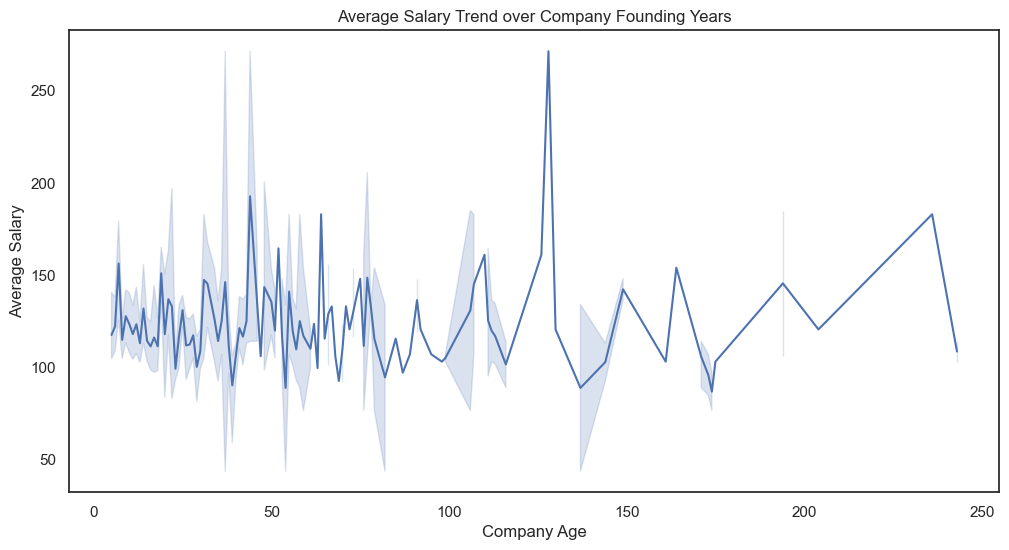

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='company_age', y='avg_salary($K)', data=df)
plt.xlabel('Company Age')
plt.ylabel('Average Salary')
plt.title('Average Salary Trend over Company Founding Years')
plt.show()

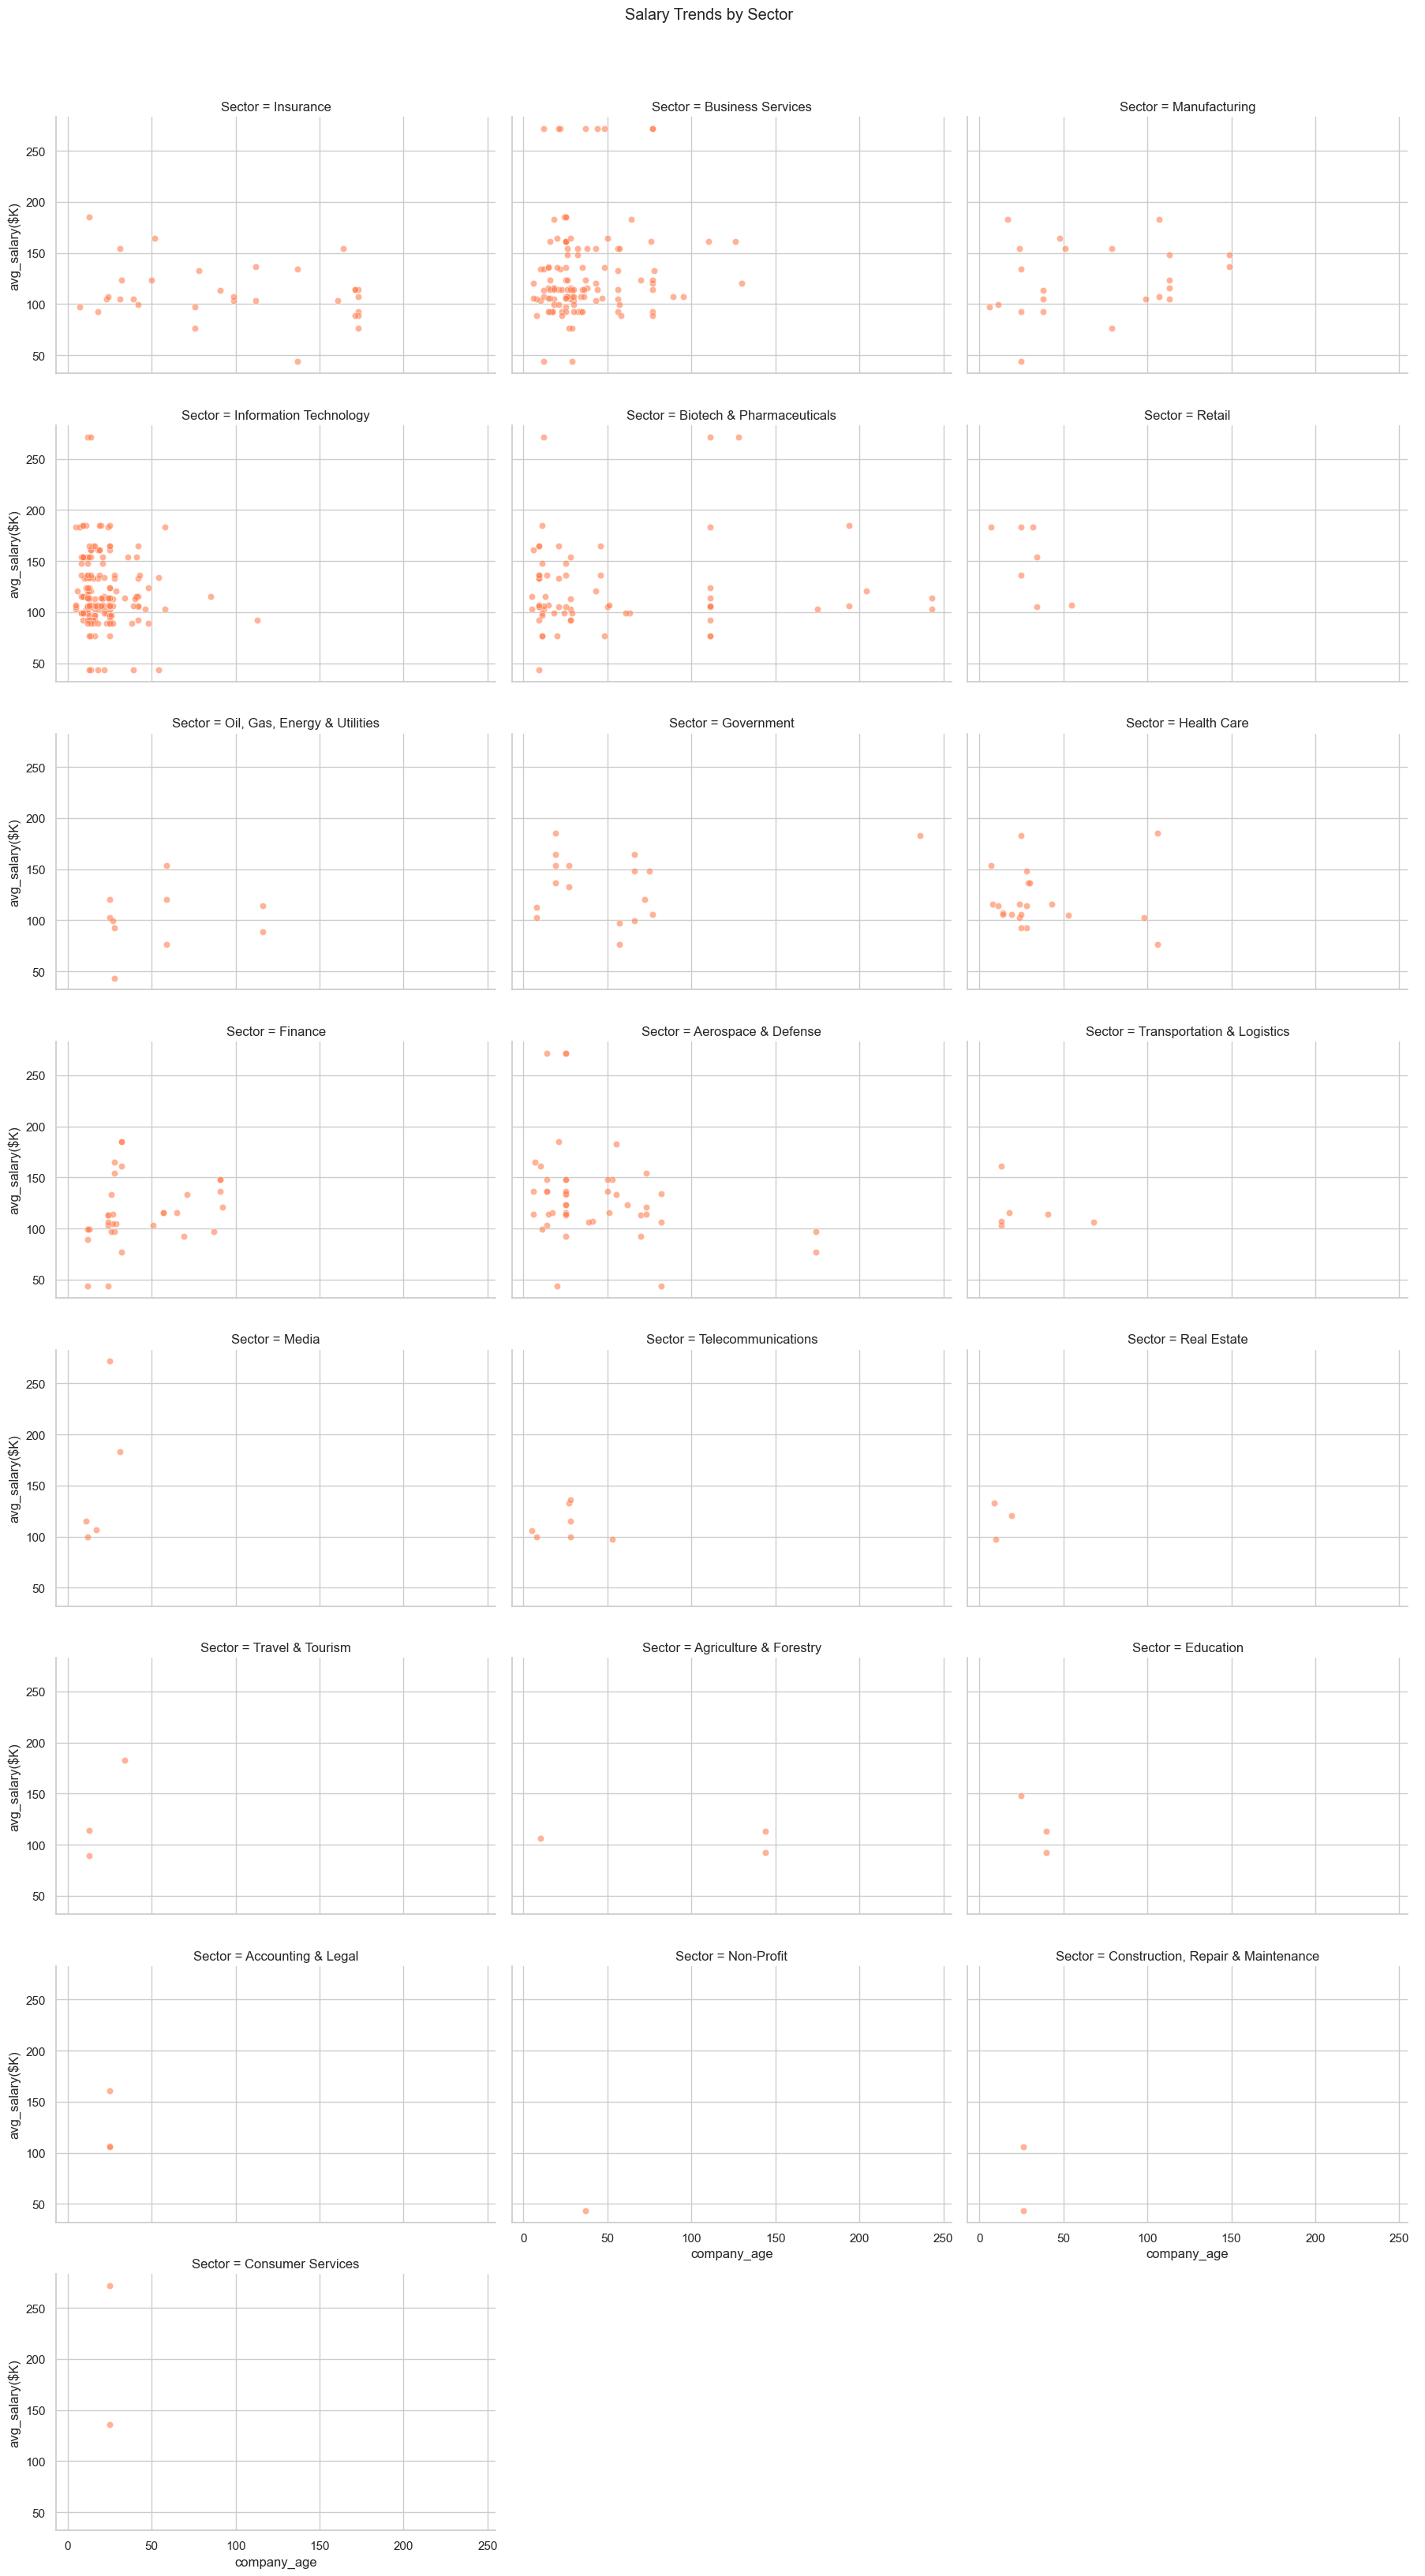

In [40]:
sns.set_theme(style="whitegrid")
g = sns.FacetGrid(df, col="Sector", col_wrap=3, height=4, aspect=1.5)
g.map(sns.scatterplot, "company_age", "avg_salary($K)", alpha=0.6, color='coral')
g.add_legend()
g.fig.suptitle('Salary Trends by Sector', y=1.02)
plt.tight_layout()
plt.show()

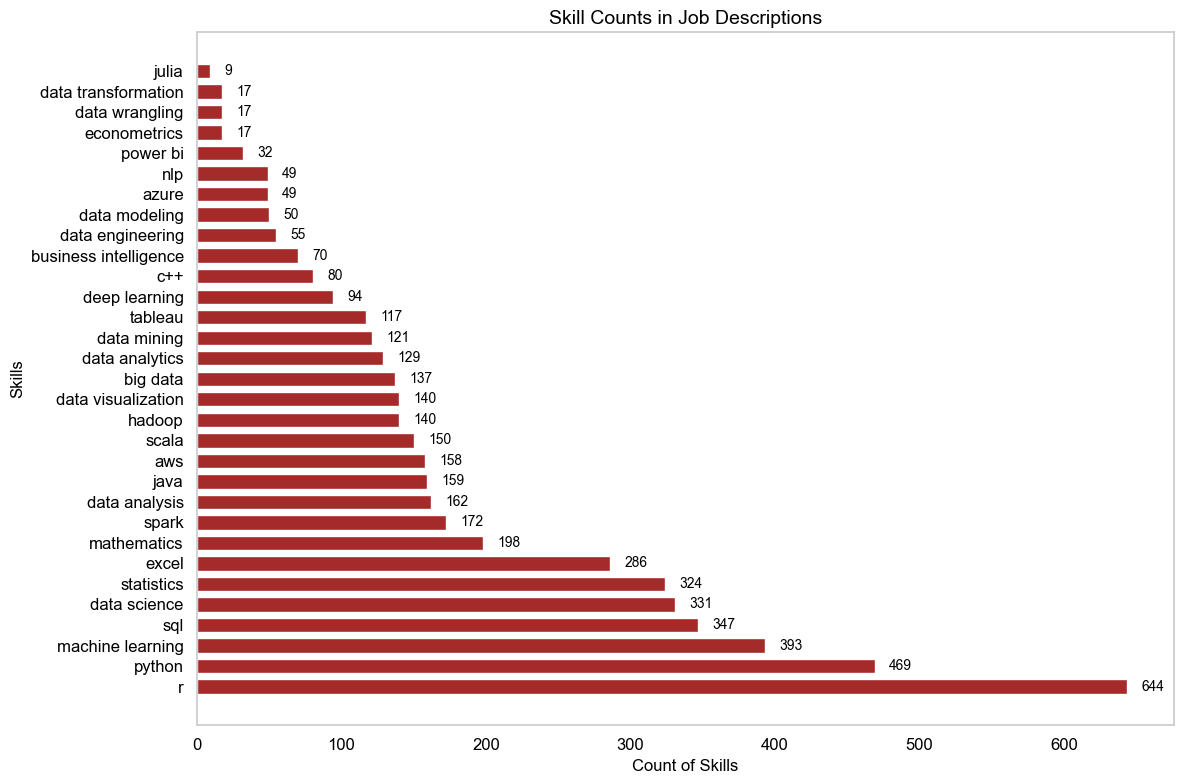

In [41]:
unique_skills = [
    'Python', 'R', 'SQL', 'Java', 'C++', 'Scala', 'Julia', 'aws', 'azure', 'excel', 
    'tableau', 'power bi', 'big data', 'hadoop', 'spark', 'machine learning', 
    'deep learning', 'nlp', 'data mining', 'statistics', 'mathematics', 
    'econometrics', 'business intelligence', 'data visualization', 'data analysis', 
    'data analytics', 'data science', 'data engineering', 'data modeling', 
    'data wrangling', 'data transformation'
]

# Convert the skills to lowercase for comparison
unique_skills_lower = [skill.strip().lower() for skill in unique_skills]

# Initialize a dictionary to count unique skill occurrences
skill_counts = {skill: 0 for skill in unique_skills_lower}

# Count the occurrences of each unique skill
for skill_list in df['skills']:
    for skil in unique_skills_lower:
        if skil in skill_list:
            skill_counts[skil] += 1

sorted_skills = dict(sorted(skill_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
skills = list(sorted_skills.keys())
counts = list(sorted_skills.values())

plt.figure(figsize=(12, 8))
bars = plt.barh(skills, counts, color='brown', edgecolor='white', height=0.7)

# Remove gridlines and any unnecessary elements for a clean design
plt.grid(False)

# Add labels and title with modern and sleek styling
plt.xlabel('Count of Skills', fontsize=12, color='black')
plt.ylabel('Skills', fontsize=12, color='black')
plt.title('Skill Counts in Job Descriptions', fontsize=14, color='black')

# Add value annotations in a simple, neat style
for bar in bars:
    plt.text(bar.get_width() + 10, bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())),
             va='center', color='black', fontsize=10)

# Customize ticks and font for a clean appearance
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')

# Display the plot with a tight layout for simplicity
plt.tight_layout()
plt.show()


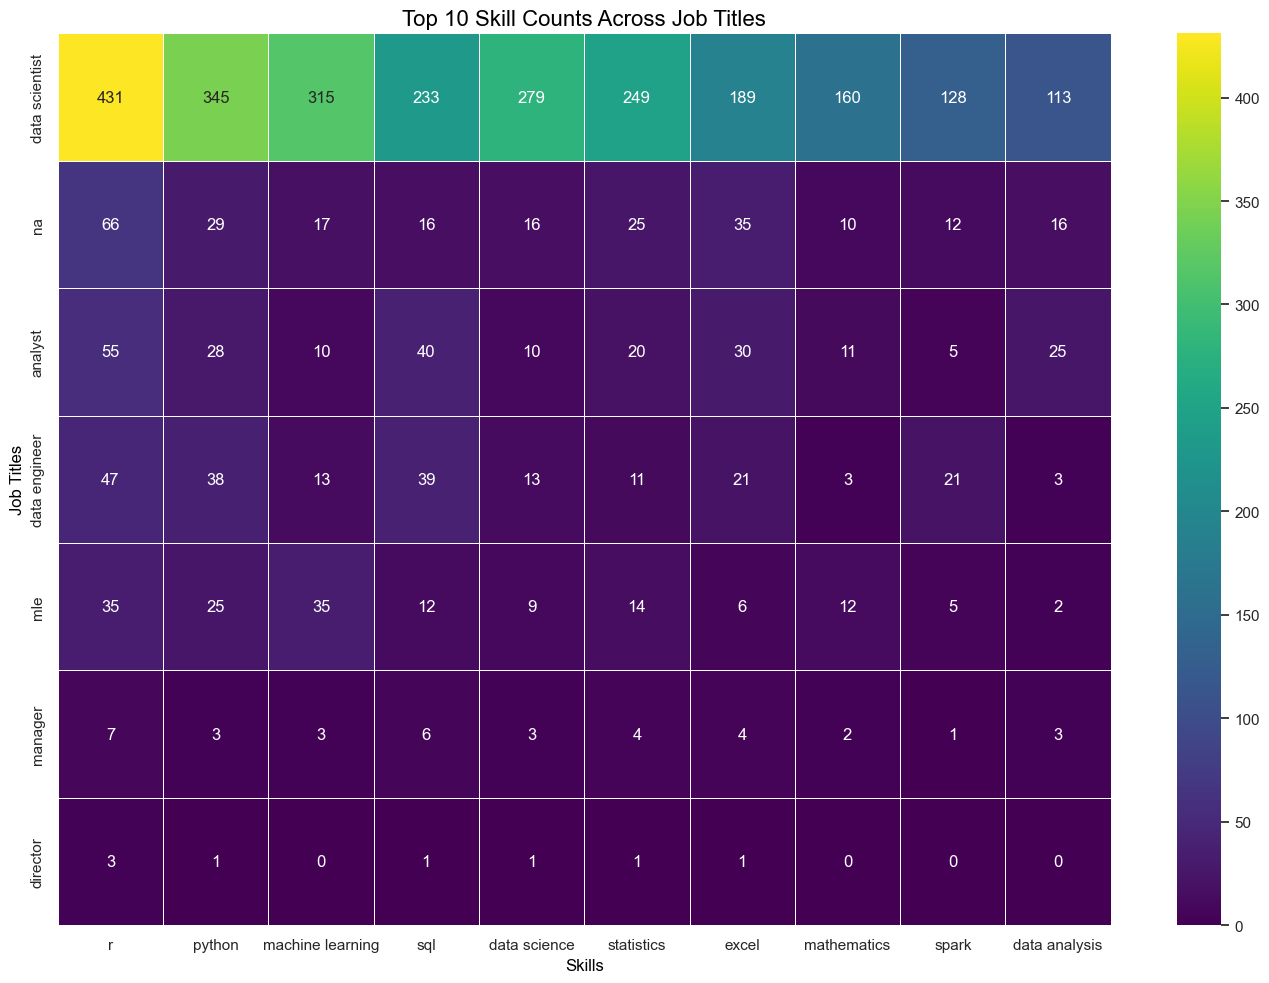

In [42]:
job_skill_counts = {}

for i, skill_list in enumerate(df['skills']):
    job_title = df['job_simp'][i]
    
    if job_title not in job_skill_counts:
        job_skill_counts[job_title] = {skill: 0 for skill in unique_skills_lower}
    
    for skill in unique_skills_lower:
        if skill in skill_list.lower():
            job_skill_counts[job_title][skill] += 1

df_skill_counts = pd.DataFrame(job_skill_counts).T.fillna(0)

top_skills = df_skill_counts.sum(axis=0).sort_values(ascending=False).head(10)

df_top_skill_counts = df_skill_counts[top_skills.index]

plt.figure(figsize=(14, 10))
sns.heatmap(df_top_skill_counts, annot=True, fmt='g', cmap='viridis', linewidths=0.5, cbar=True)

plt.title('Top 10 Skill Counts Across Job Titles', fontsize=16, color='black')
plt.xlabel('Skills', fontsize=12, color='black')
plt.ylabel('Job Titles', fontsize=12, color='black')

plt.tight_layout()
plt.show()


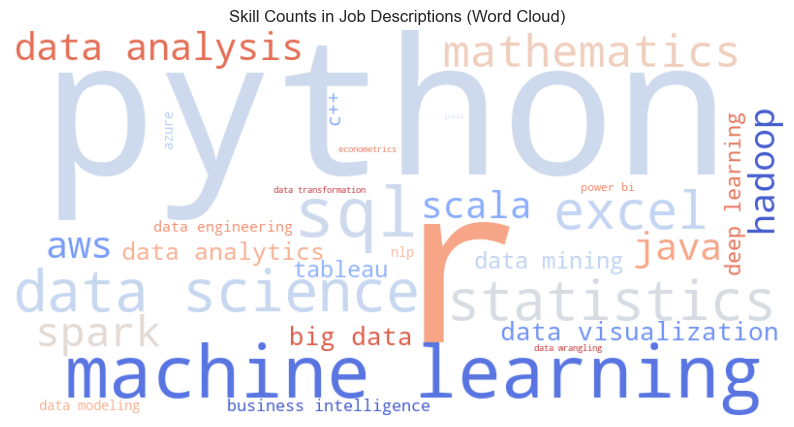

In [43]:
# Generate a Word Cloud from the skill counts
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(sorted_skills)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axis
plt.title('Skill Counts in Job Descriptions (Word Cloud)')

# Display the Word Cloud
plt.show()


In [44]:
state_job_counts = df['Job_State'].value_counts().reset_index()
state_job_counts.columns = ['Job_State', 'JobCount']

fig = px.choropleth(state_job_counts,
                    locations='Job_State', 
                    locationmode="USA-states", 
                    color='JobCount',
                    scope="usa",
                    color_continuous_scale="Viridis",
                    title="Job Distribution Across States")
fig.show()

In [45]:
fig = px.scatter(df, x='Revenue', y='No_of_Competitors', size='avg_salary($K)',
                 hover_name='Company Name', log_x=True, size_max=60,
                 title='Relationship between Revenue, Competitors, and Salary')
fig.show()

# Data Transformation

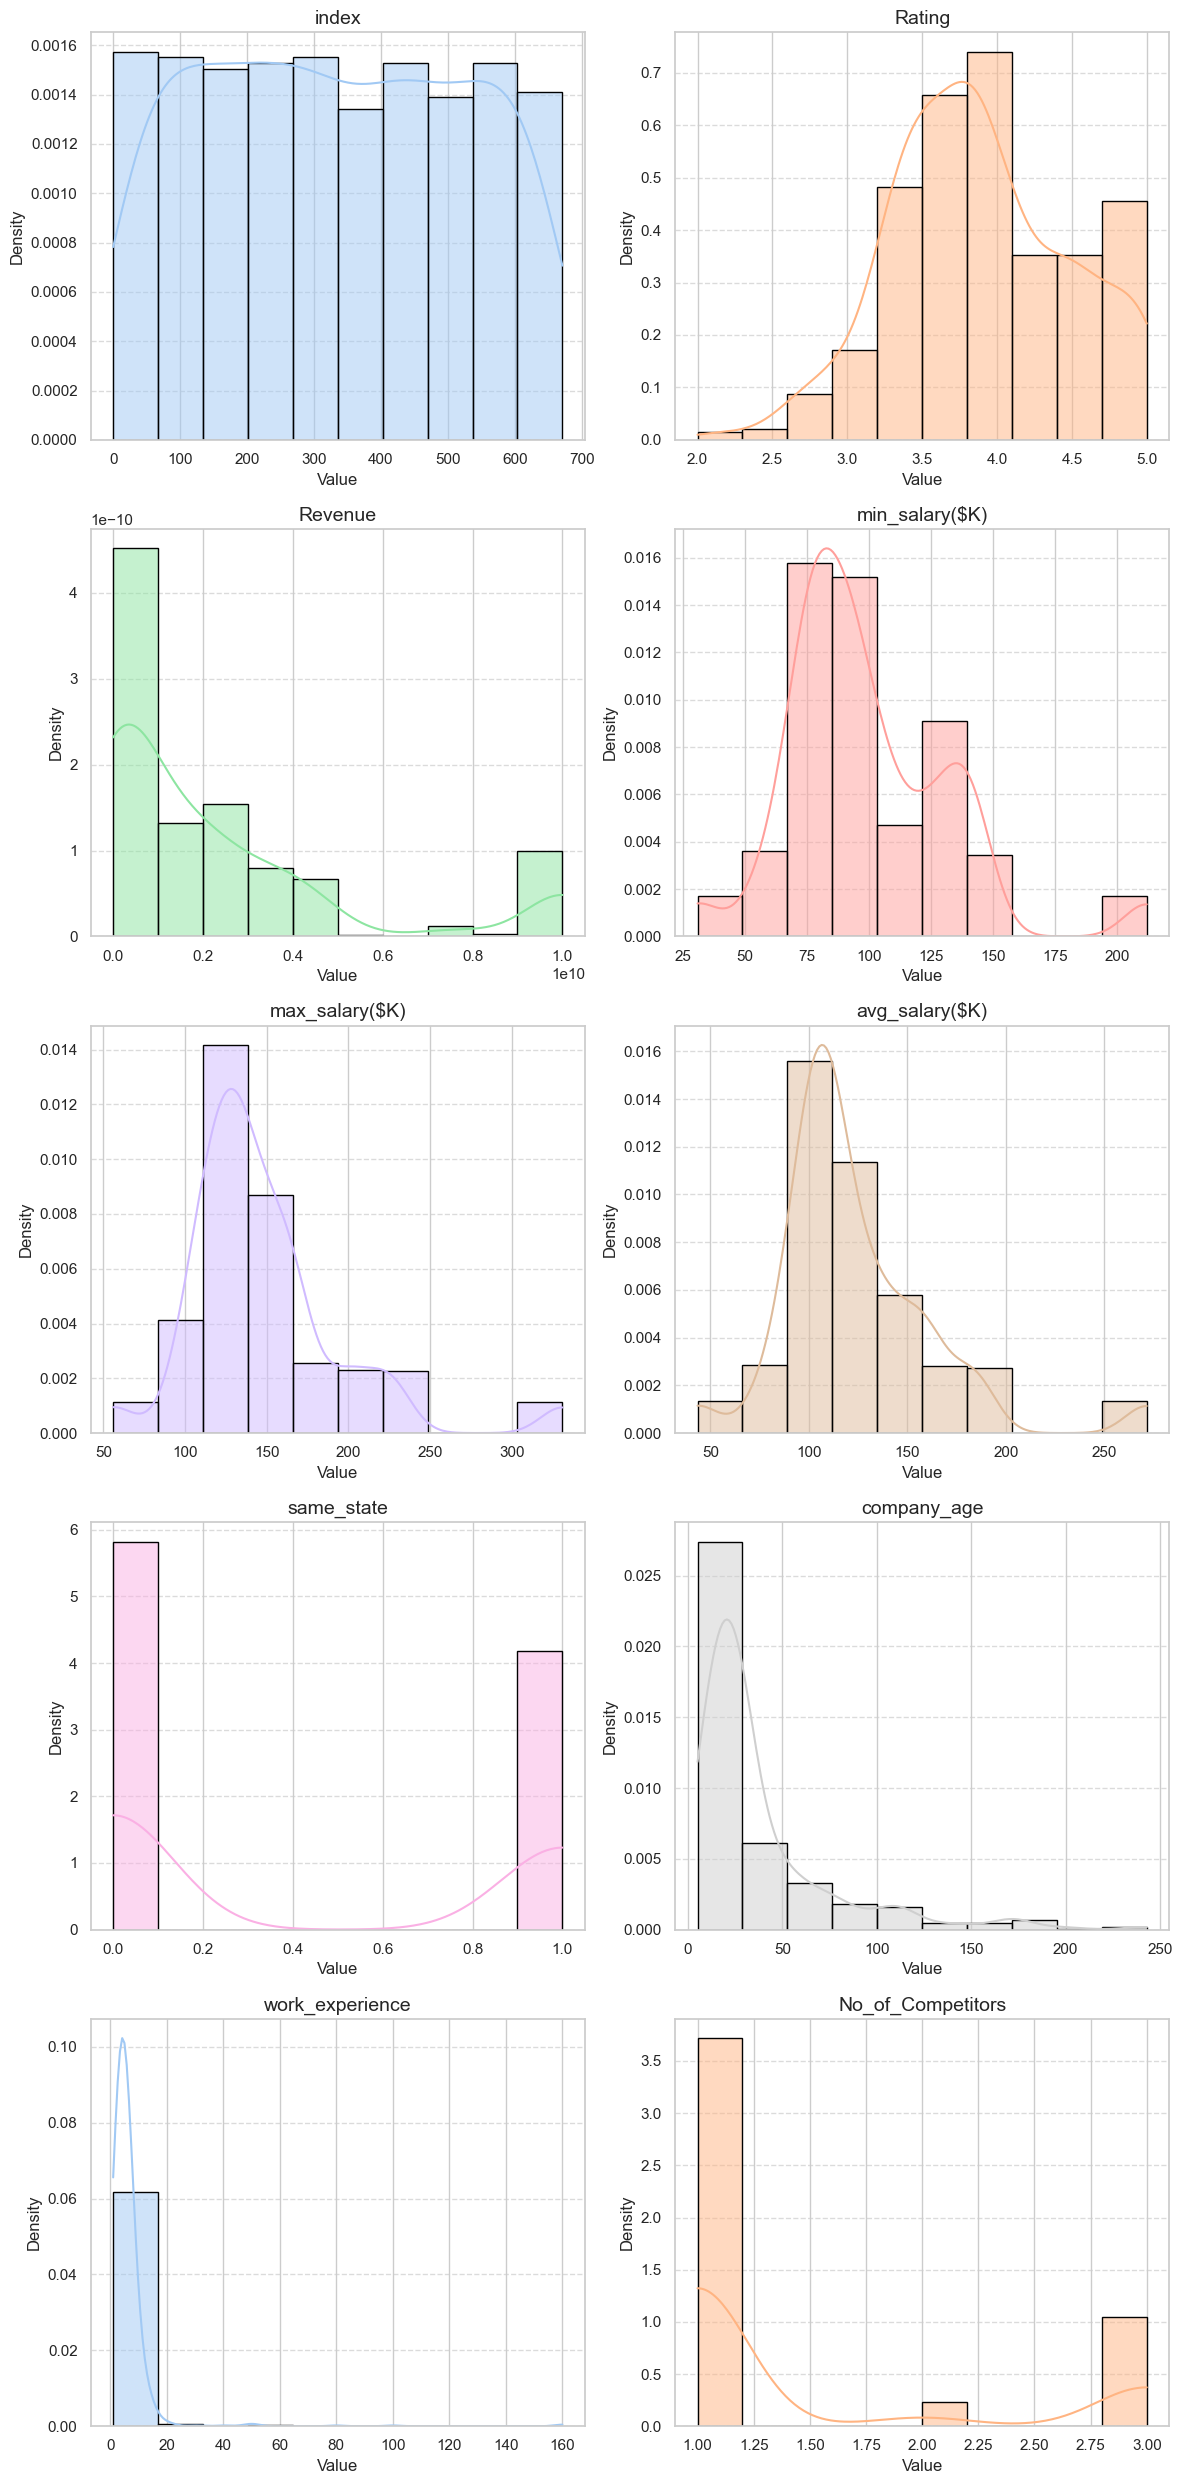

In [46]:
numeric_cols = df.select_dtypes(include=['number']).columns

# Set the number of rows and columns for subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 1) // 2  # Two plots per row

# Create a figure for the subplots
plt.figure(figsize=(12, num_rows * 5))

# Loop through each numeric column and create a histplot with KDE
for i, column in enumerate(numeric_cols):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid as needed
    sns.histplot(df[column], kde=True, color=sns.color_palette("pastel")[i % 8], bins=10, stat='density', edgecolor='black')
    plt.title(column, fontsize=14)
    plt.xlabel('Value', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

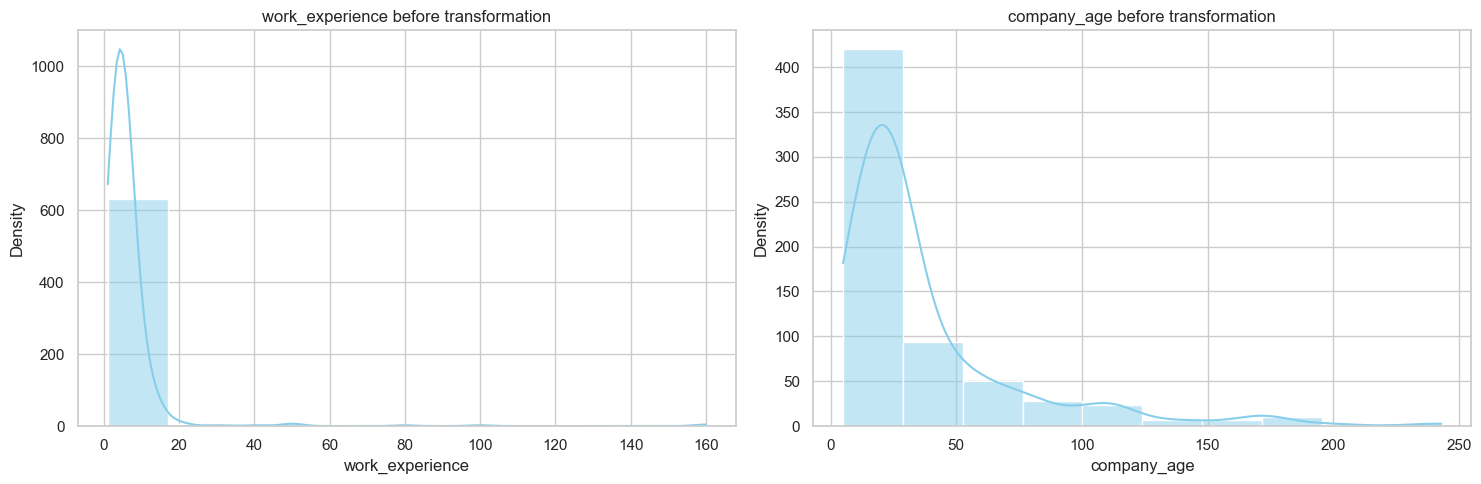

Skewness before transformation:
 work_experience    10.824240
company_age         2.462498
dtype: float64


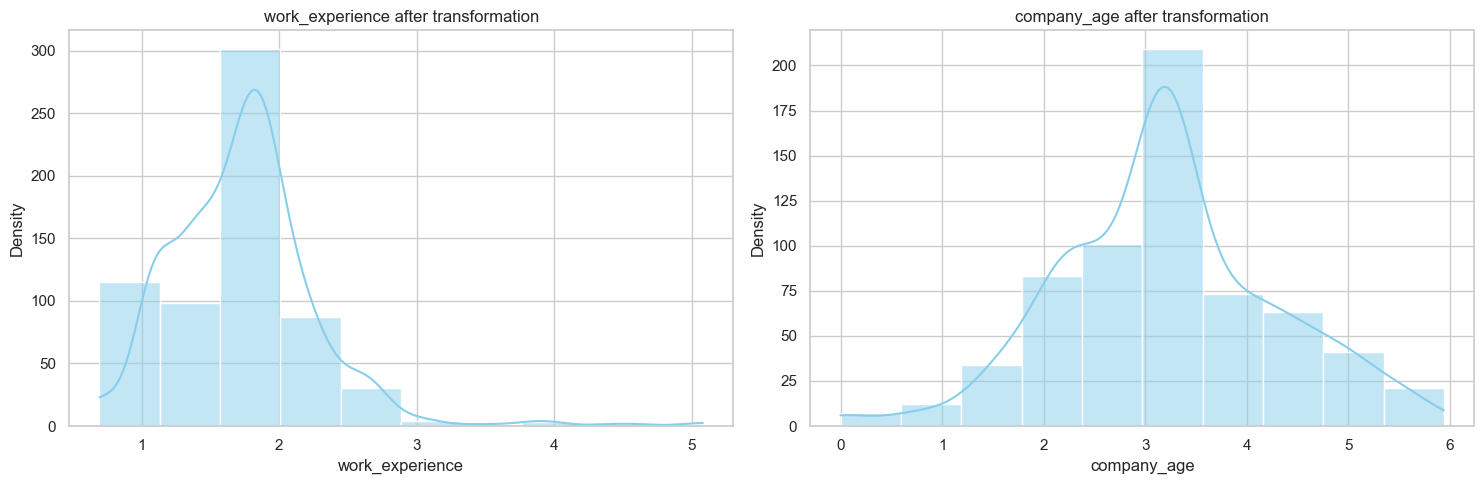

Skewness after transformation:
 work_experience    1.541062
company_age        0.002766
dtype: float64


In [47]:
def plot_distributions(df, cols, title_suffix):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(cols):
        plt.subplot(1, len(cols), i + 1)
        sns.histplot(df[col], kde=True, color="skyblue", bins=10)
        plt.title(f'{col} {title_suffix}')
        plt.xlabel(col)
        plt.ylabel('Density')
    plt.tight_layout()
    plt.show()

# Step 1: Visualize original distributions
plot_distributions(df, ['work_experience', 'company_age'], 'before transformation')

# Step 2: Check skewness
skewness = df[['work_experience', 'company_age']].skew()
print("Skewness before transformation:\n", skewness)

# Step 3: Transform columns
# Apply Box-Cox transformation to FoundedYear and CompanyAge
def boxcox_transform(column):
    # Shift the data to avoid zero values
    transformed_column, _ = stats.boxcox(column - column.min() + 1)  
    return transformed_column

df['work_experience'] = np.log(df['work_experience'] + 1)  # Log transformation
df['company_age'] = boxcox_transform(df['company_age'])

# Step 4: Visualize transformed distributions
plot_distributions(df, ['work_experience', 'company_age'], 'after transformation')

# Check skewness after transformation
skewness_after = df[['work_experience', 'company_age']].skew()
print("Skewness after transformation:\n", skewness_after)

# Transform the columns

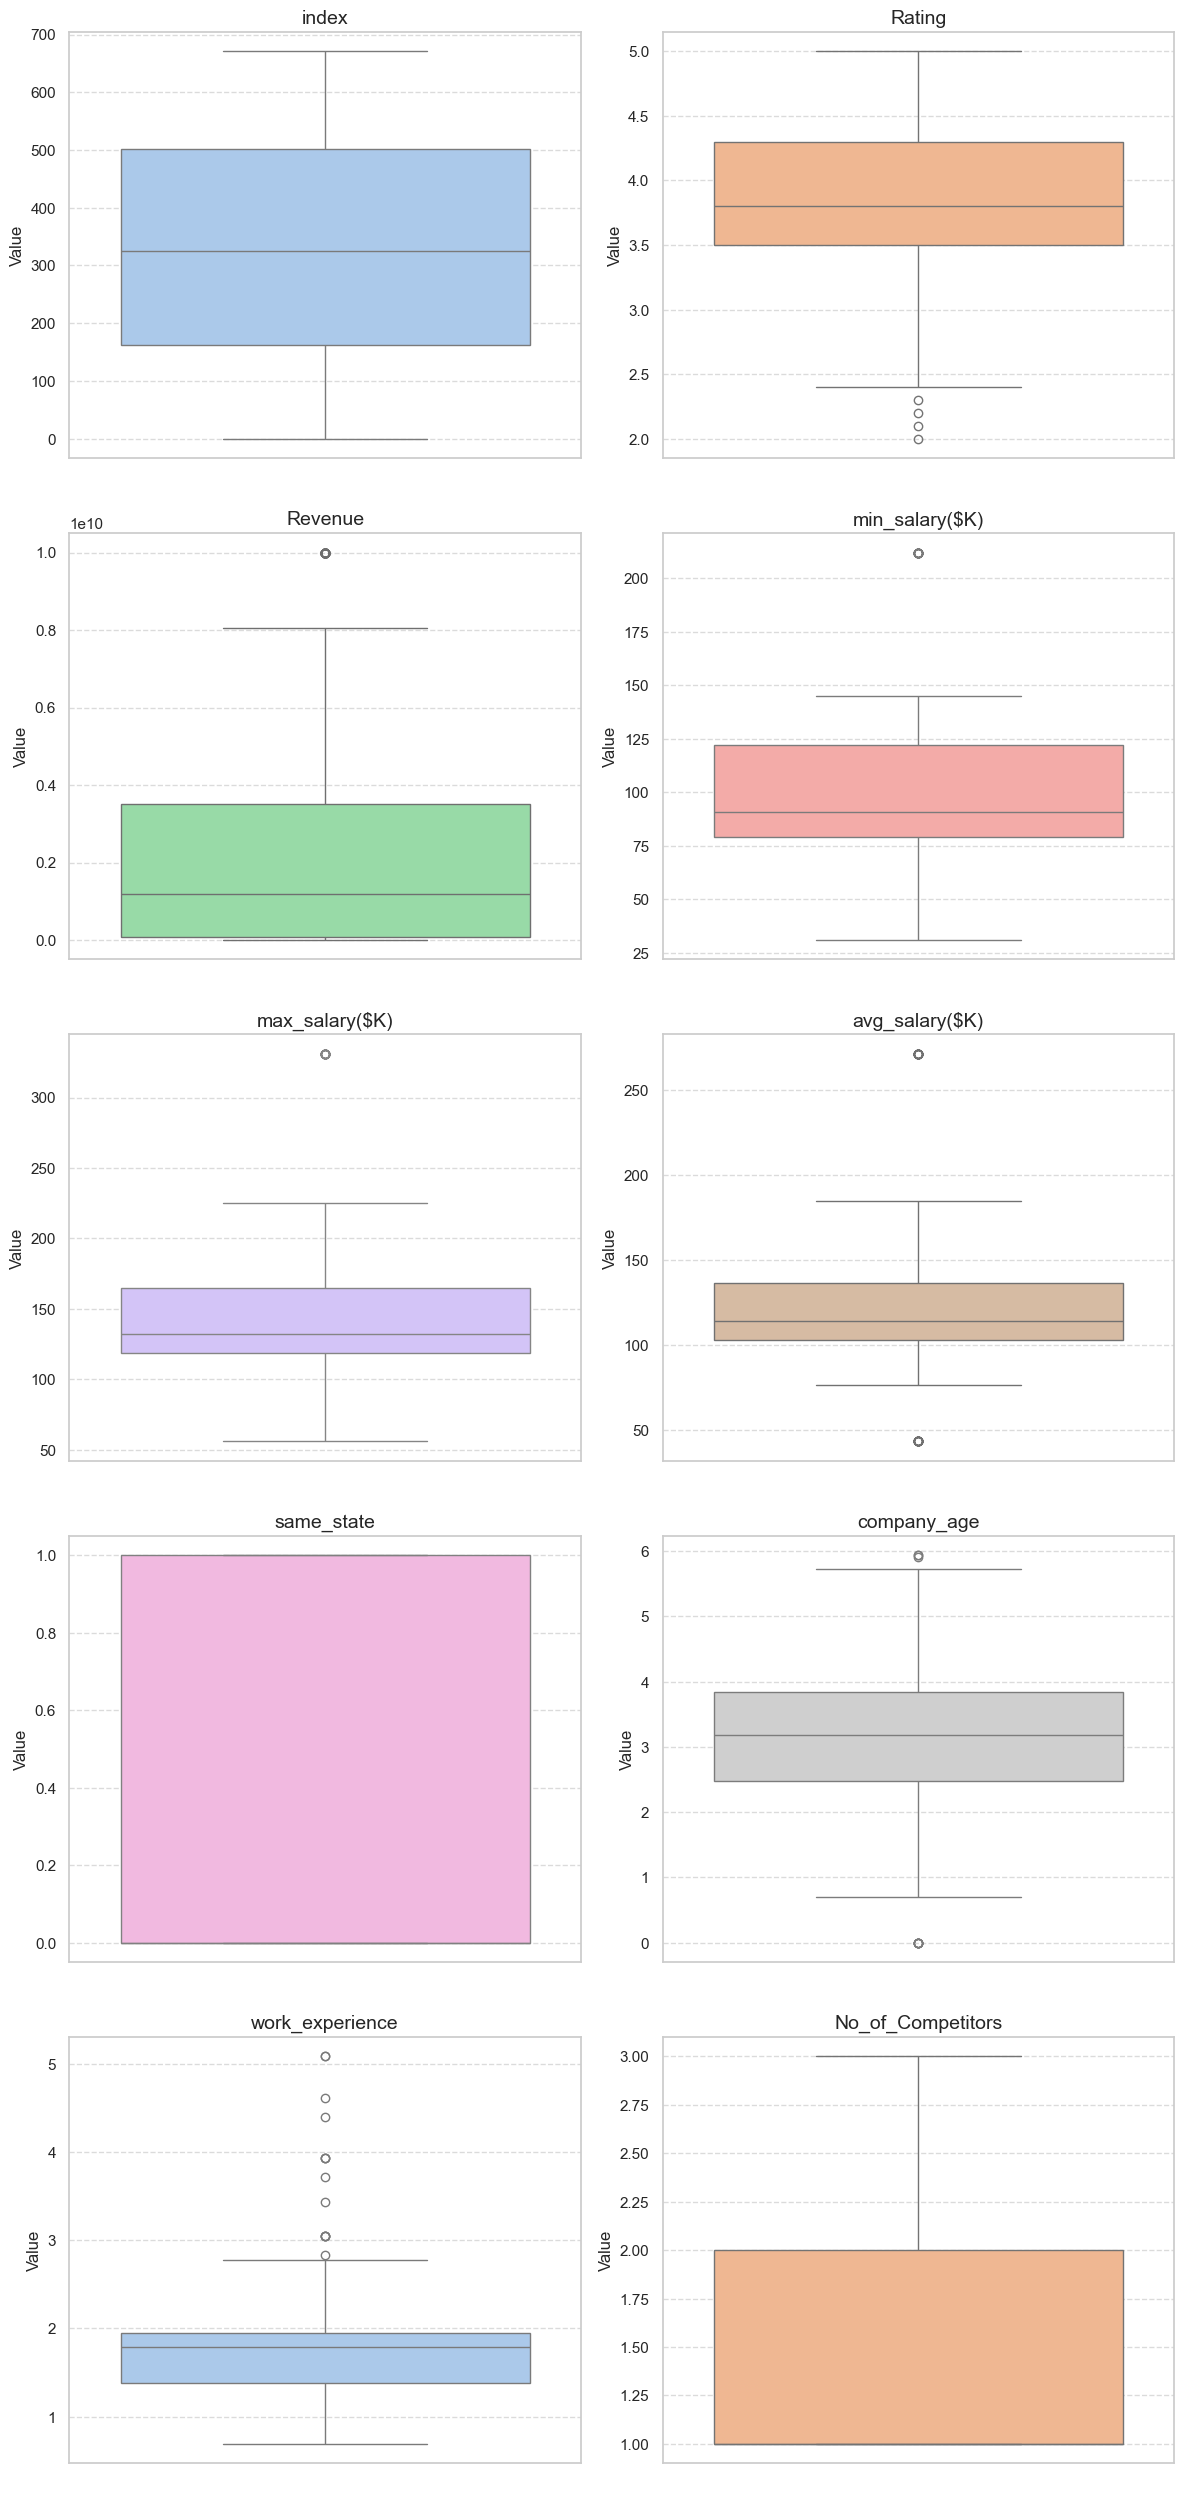

In [48]:
numeric_col = df.select_dtypes(include='number')
# Set the number of rows and columns for subplots
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Two plots per row

# Create a figure for the subplots
plt.figure(figsize=(12, num_rows * 5))

# Loop through each column and create a boxplot
for i, column in enumerate(numeric_col.columns):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df[column], color=sns.color_palette("pastel")[i % 8])  # Use pastel colors
    plt.title(column, fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel(' ', fontsize=12)  # Label for the x-axis (empty for aesthetics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [49]:
def count_outliers(df):
    outlier_counts = {}
    
    # Loop through each numeric column
    for col in df.select_dtypes(include=['number']).columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]  # Number of outliers
    
    return outlier_counts 

# Get the number of outliers in each numeric column
outlier_counts = count_outliers(df)

for col, count in outlier_counts.items():
    print(f'Number of outliers in {col}: {count}')

Number of outliers in index: 0
Number of outliers in Rating: 4
Number of outliers in Revenue: 64
Number of outliers in min_salary($K): 20
Number of outliers in max_salary($K): 20
Number of outliers in avg_salary($K): 40
Number of outliers in same_state: 0
Number of outliers in company_age: 10
Number of outliers in work_experience: 14
Number of outliers in No_of_Competitors: 0


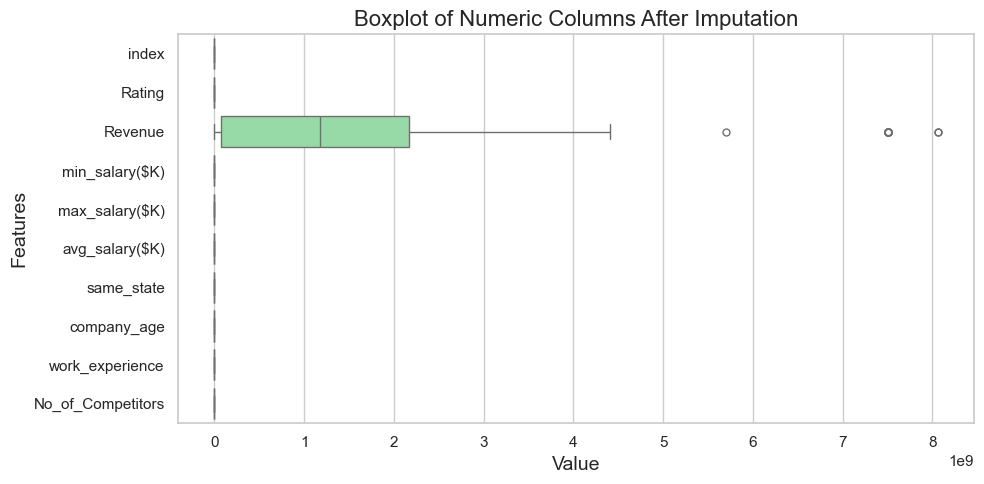

In [50]:
def impute_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Replace outliers with median
        median = df[col].median()
        df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), median, df[col])
    return df

# Impute outliers in the DataFrame
df_imputed = impute_outliers(df)

def plot_boxplots(df):
    plt.figure(figsize=(10, 5))  # Adjusted figure size for clarity
    sns.set(style="whitegrid")  # Set a clean style

    # Create a horizontal boxplot
    sns.boxplot(data=df, orient="h", palette="pastel", fliersize=5)

    plt.title('Boxplot of Numeric Columns After Imputation', fontsize=16)
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    
    plt.tight_layout()
    plt.show()

# Plot boxplots for the imputed DataFrame
plot_boxplots(df_imputed)

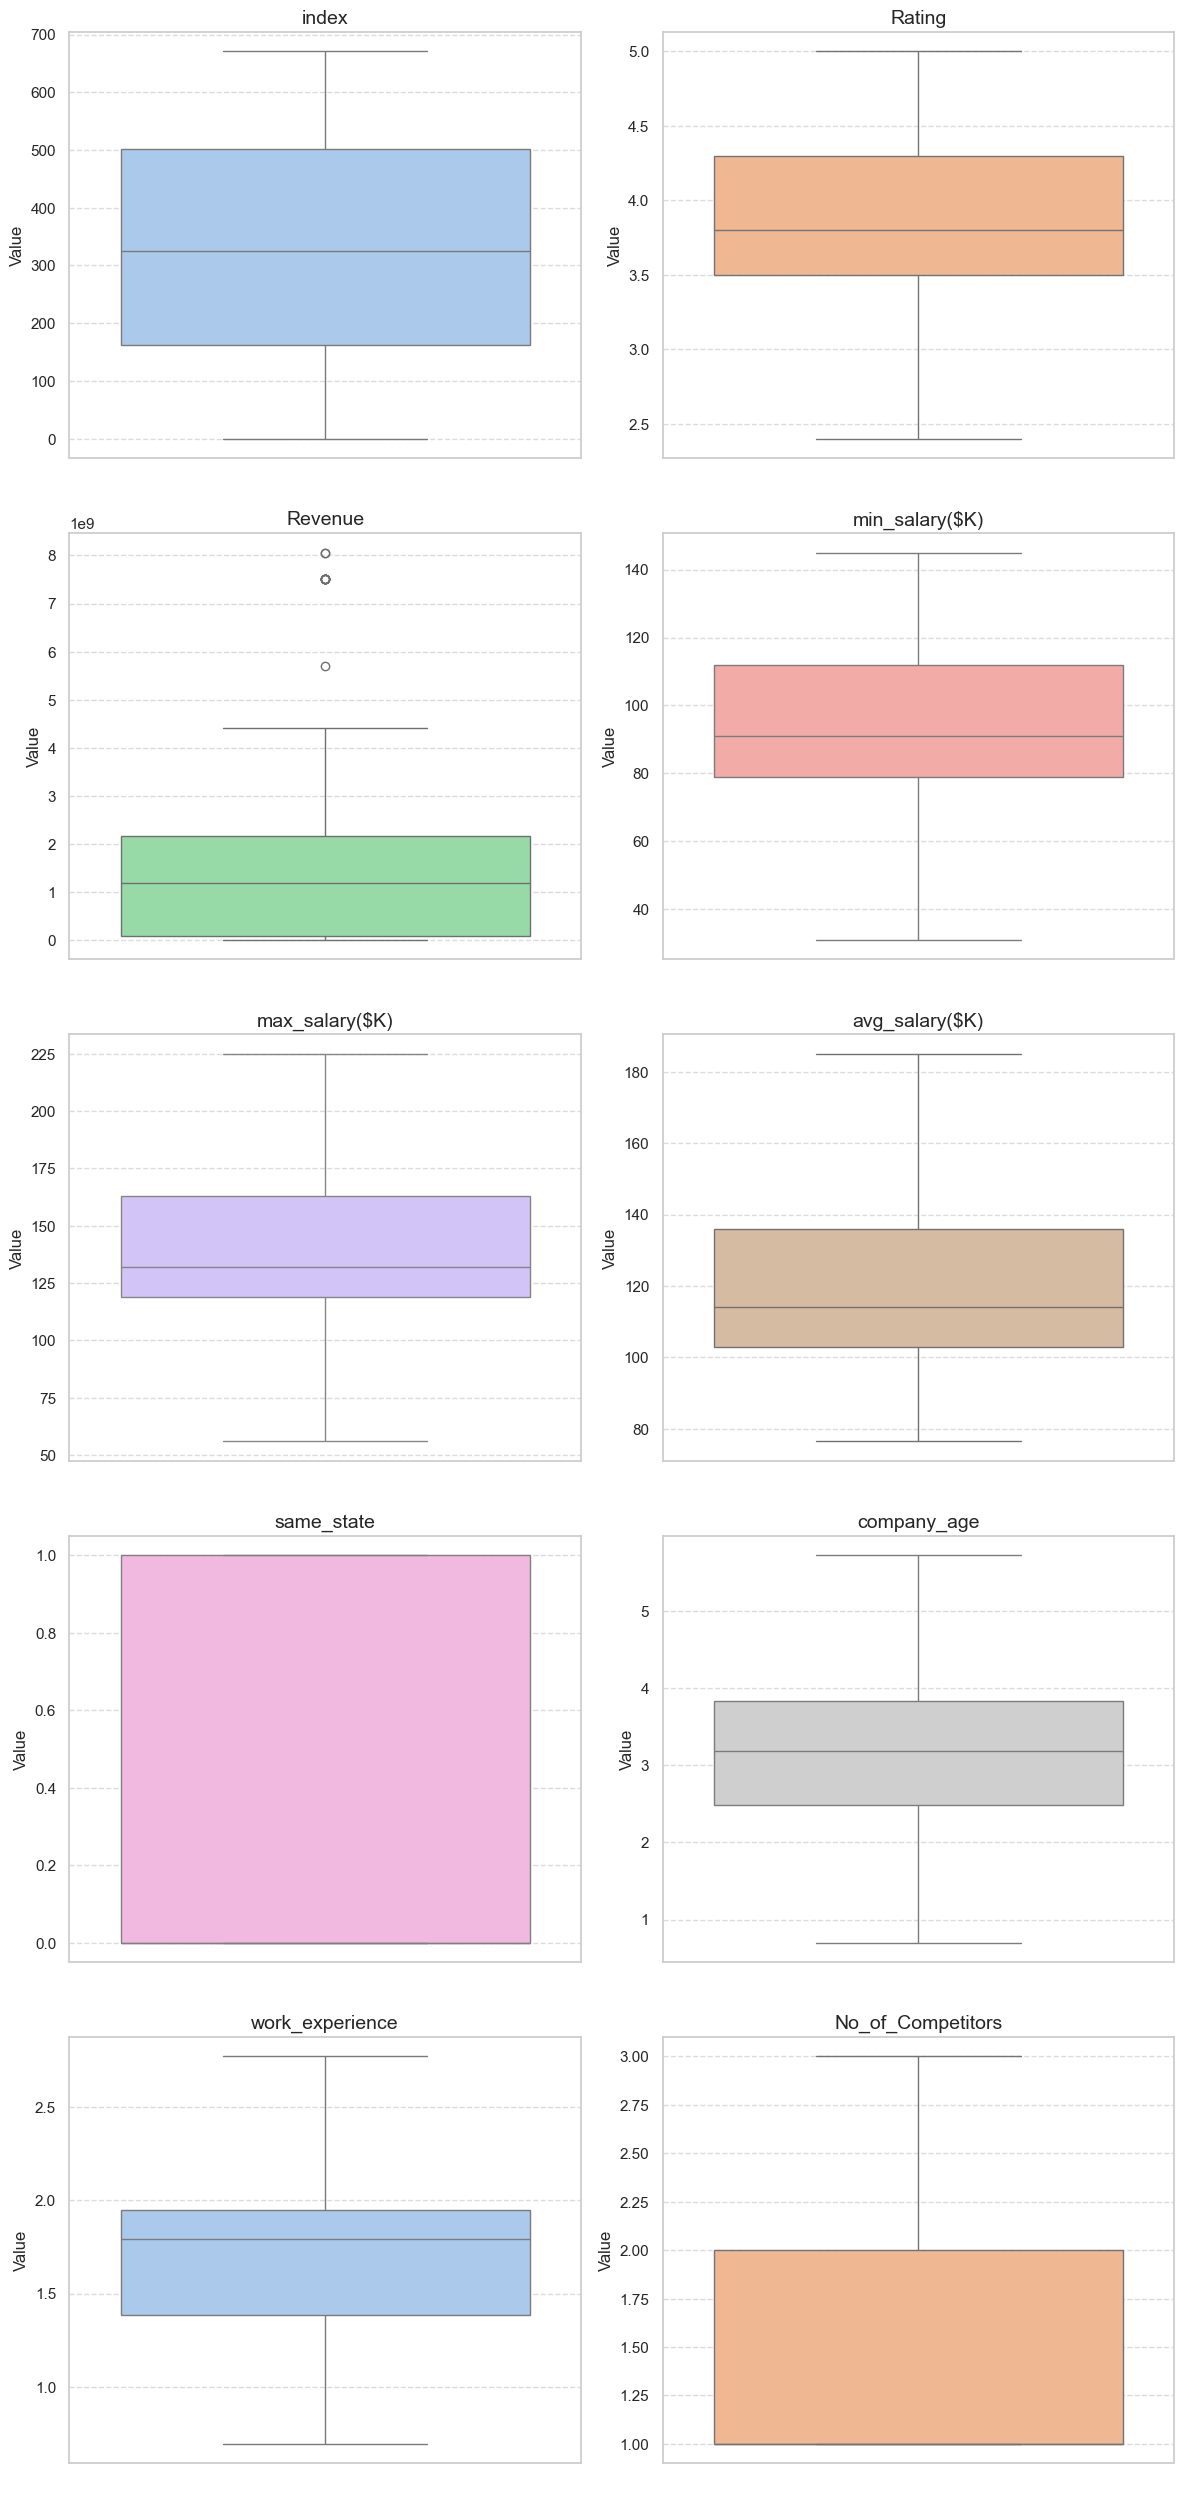

In [51]:
numeric_col = df.select_dtypes(include='number')
# Set the number of rows and columns for subplots
num_cols = len(df.columns)
num_rows = (num_cols + 1) // 2  # Two plots per row

# Create a figure for the subplots
plt.figure(figsize=(12, num_rows * 5))

# Loop through each column and create a boxplot
for i, column in enumerate(numeric_col.columns):
    plt.subplot(num_rows, 2, i + 1)  # Adjust the subplot grid as needed
    sns.boxplot(y=df[column], color=sns.color_palette("pastel")[i % 8])  # Use pastel colors
    plt.title(column, fontsize=14)
    plt.ylabel('Value', fontsize=12)
    plt.xlabel(' ', fontsize=12)  # Label for the x-axis (empty for aesthetics)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

In [52]:
scaler = StandardScaler()
df[['min_salary($K)', 'max_salary($K)', 'Revenue']] = scaler.fit_transform(df[['min_salary($K)', 'max_salary($K)', 'Revenue']])

In [53]:
df.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,avg_salary($K),salary_category,Job_State,same_state,company_age,skills,work_experience,job_simp,seniority,No_of_Competitors
0,0.0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000,Nonprofit Organization,...,154.0,high,NY,1.0,3.460123,"r, aws, azure, machine learning, statistics, d...",1.945910,data scientist,senior,3.0
1,1.0,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000,Public,...,154.0,high,VA,0.0,4.188909,"r, sql, big data, hadoop, machine learning, st...",2.772589,data scientist,na,1.0
2,2.0,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000,Private Practice / Firm,...,154.0,high,MA,1.0,3.867295,"python, r, c++, aws, excel, machine learning, ...",1.098612,data scientist,na,1.0
3,3.0,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000,Public,...,154.0,high,MA,0.0,3.131059,"python, r, sql, aws, excel, machine learning, ...",1.098612,data scientist,na,3.0
4,4.0,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200,Private,...,154.0,high,NY,1.0,3.235253,"python, r, sql, excel, machine learning, stati...",1.945910,data scientist,na,3.0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              644 non-null    float64
 1   Job Title          644 non-null    object 
 2   Salary Estimate    644 non-null    object 
 3   Job Description    644 non-null    object 
 4   Rating             644 non-null    float64
 5   Company Name       644 non-null    object 
 6   Location           644 non-null    object 
 7   Headquarters       641 non-null    object 
 8   Size               644 non-null    object 
 9   Type of ownership  641 non-null    object 
 10  Industry           601 non-null    object 
 11  Sector             601 non-null    object 
 12  Revenue            644 non-null    float64
 13  Competitors        171 non-null    object 
 14  min_salary($K)     644 non-null    float64
 15  max_salary($K)     644 non-null    float64
 16  avg_salary($K)     644 non